In [3]:
%load_ext autoreload
%autoreload 2


%matplotlib inline
%cd C:\MAD4AG

from tqdm.auto import tqdm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
#import geopandas as gpd

warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\MAD4AG


In [4]:
file = r'.\dbs\twins\03-21-schedule-4.pkl'

df_act_schedule_0 = pd.read_pickle(file)



In [5]:
df_act_schedule_0['X_shift'] =df_act_schedule_0['X'].shift(1)
df_act_schedule_0['Y_shift'] =df_act_schedule_0['Y'].shift(1)
df_act_schedule_0_dist = df_act_schedule_0[df_act_schedule_0.act_seq!=0]

In [6]:
df_act_schedule_0_dist['trip_distance'] = np.sqrt((df_act_schedule_0_dist['X_shift']-df_act_schedule_0_dist['X'])**2+(df_act_schedule_0_dist['Y_shift']-df_act_schedule_0_dist['Y'])**2)

In [7]:
df_syn_act_plan = pd.read_pickle(
    r'C:\Synthetic_population\code\new_synthetic_sweden\output\synthetic_population\df_act_plan.pkl')
syn_pop_all = pd.read_pickle(
    r'C:\Synthetic_population\code\new_synthetic_sweden\output\synthetic_population\syn_pop_all.pkl')

adult_list = syn_pop_all['PId'][syn_pop_all.age > 17].unique()
df_syn_act_plan = df_syn_act_plan[df_syn_act_plan.PId.isin(adult_list)]

In [8]:
df_syn_act_plan['X_shift'] =df_syn_act_plan['POINT_X_sweref99'].shift(1)
df_syn_act_plan['Y_shift'] =df_syn_act_plan['POINT_Y_sweref99'].shift(1)
df_syn_act_plan_dist = df_syn_act_plan[df_syn_act_plan.act_id!=0]

In [9]:
df_syn_act_plan_dist['trip_distance'] = np.sqrt((df_syn_act_plan_dist['X_shift']-df_syn_act_plan_dist['POINT_X_sweref99'])**2+(df_syn_act_plan_dist['Y_shift']-df_syn_act_plan_dist['POINT_Y_sweref99'])**2)

In [10]:
df_act_schedule_0_dist['trip_distance']=df_act_schedule_0_dist['trip_distance']/1000
df_syn_act_plan_dist['trip_distance']=df_syn_act_plan_dist['trip_distance']/1000

In [11]:
df_act_schedule_0_dist['wt_i'] = df_act_schedule_0_dist['wt'].round(0).astype(int)

df_act_schedule_0_dist = pd.DataFrame(np.repeat(df_act_schedule_0_dist.values, df_act_schedule_0_dist['wt_i'].replace(0,1).tolist(), axis=0), columns=df_act_schedule_0_dist.columns)

In [12]:
MAD_mean=df_act_schedule_0_dist['trip_distance'].mean().round(decimals=2)
MAD_median=df_act_schedule_0_dist['trip_distance'].median().round(decimals=2)
MAD_90=np.round(df_act_schedule_0_dist['trip_distance'].quantile(0.9),2)
SySMO_mean=df_syn_act_plan_dist['trip_distance'].mean().round(decimals=2)
SySMO_median=df_syn_act_plan_dist['trip_distance'].median().round(decimals=2)
SySMO_90=df_syn_act_plan_dist['trip_distance'].quantile(0.9).round(decimals=2)
#
print(pd.DataFrame(index=['MAD', 'SySMo'],data=[[MAD_mean,MAD_median,MAD_90],[SySMO_mean,SySMO_median,SySMO_90]],columns=['mean','median','90th percentile']))


        mean  median  90th percentile
MAD    21.13    3.91            55.35
SySMo   9.75    3.40            21.30


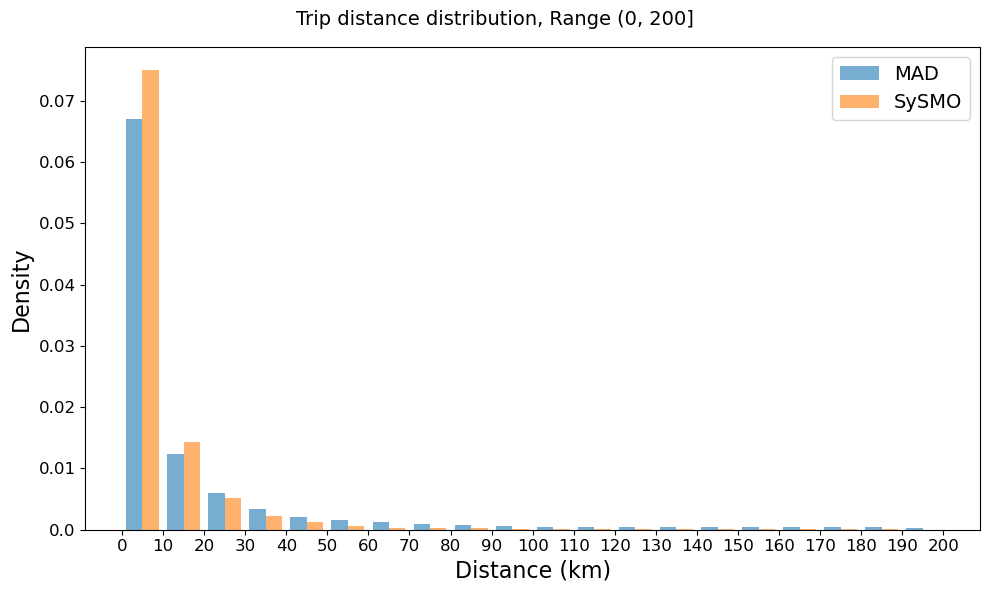

In [13]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (10, 6))


ax0.hist([df_act_schedule_0_dist['trip_distance'][df_act_schedule_0_dist['trip_distance']<201],df_syn_act_plan_dist['trip_distance'][df_syn_act_plan_dist['trip_distance']<201]], density=True, histtype='bar', alpha=0.6, bins=range(0,201,10), label=['MAD','SySMO'])

ax0.grid(visible=False)

ax0.legend( prop={'size': 14}, fontsize=14)
ax0.set_xlabel('Distance (km)', fontsize=16)
ax0.set_xticks(range(0,201,10),range(0,201,10), fontsize=12)
ax0.set_yticklabels(np.arange(0.00, 0.07, 0.01), fontsize=12)
ax0.set_ylabel('Density', fontsize=16)


# MAD_mean=df_act_schedule_0_dist['trip_distance'].mean().round(decimals=2)
# MAD_median=df_act_schedule_0_dist['trip_distance'].median().round(decimals=2)
# MAD_90=np.round(df_act_schedule_0_dist['trip_distance'].quantile(0.9),2)
# SySMO_mean=df_syn_act_plan_dist['trip_distance'].mean().round(decimals=2)
# SySMO_median=df_syn_act_plan_dist['trip_distance'].median().round(decimals=2)
# SySMO_90=df_syn_act_plan_dist['trip_distance'].quantile(0.9).round(decimals=2)
# #
# ax0.table(cellText=[[MAD_mean,MAD_median,MAD_90], [SySMO_mean,SySMO_median,SySMO_90]],
#           cellLoc='center',
#                   colWidths = [0.16]*3,
#                   rowLabels=['MAD','SySMO'],
#                   colLabels=['mean','median','90th percentile'],
#                   loc='center right',edges='open')


fig.suptitle('Trip distance distribution, Range (0, 200]' , fontsize=14)
fig.tight_layout()
plt.savefig("./figures/trip_distance_MAD_SySMO.png")
plt.show()


In [14]:
MAD_commute = df_act_schedule_0_dist['trip_distance'][(df_act_schedule_0_dist['trip_distance']<201)&(df_act_schedule_0_dist['purpose']=='Work')]
SySMo_commute = df_syn_act_plan_dist['trip_distance'][(df_syn_act_plan_dist['trip_distance']<201)&(df_syn_act_plan_dist['act_purpose']==4)]

In [15]:
MAD_mean=MAD_commute.mean().round(decimals=2)
MAD_median=MAD_commute.median().round(decimals=2)
MAD_90= np.round(MAD_commute.quantile(0.9),2)
SySMO_mean=SySMo_commute.mean().round(decimals=2)
SySMO_median=SySMo_commute.median().round(decimals=2)
SySMO_90=SySMo_commute.quantile(0.9).round(decimals=2)

pd.DataFrame(index=['MAD', 'SySMo'],data=[[MAD_mean,MAD_median,MAD_90],[SySMO_mean,SySMO_median,SySMO_90]],columns=['mean','median','90th percentile'])

,mean,median,90th percentile
MAD,15.96,5.53,39.33
SySMo,10.12,4.61,25.13


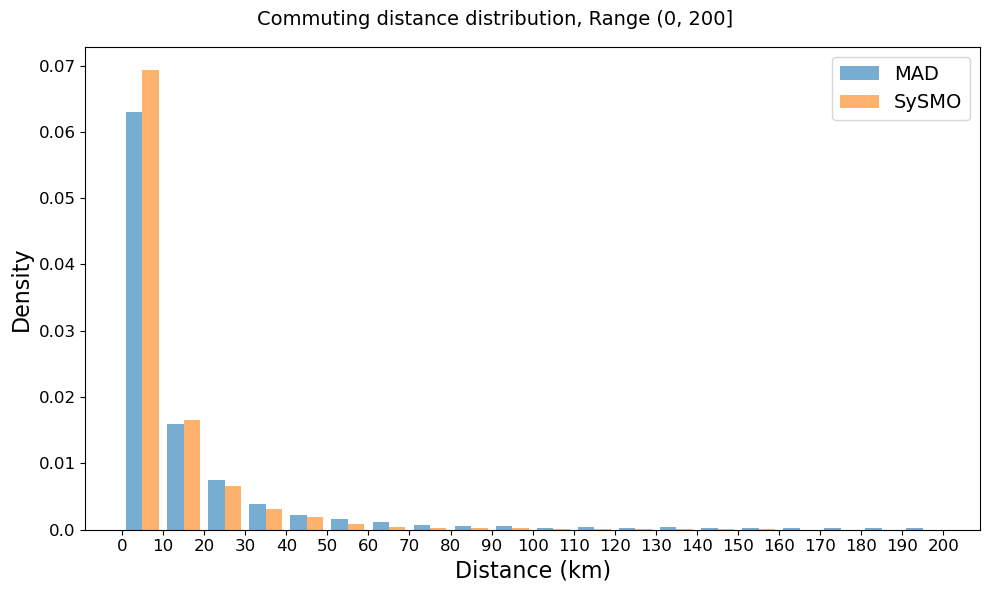

In [16]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (10, 6))



ax0.hist([MAD_commute,SySMo_commute], density=True, histtype='bar', alpha=0.6, bins=range(0,201,10), label=['MAD','SySMO'])

ax0.grid(visible=False)

ax0.legend( prop={'size': 14}, fontsize=14)
ax0.set_xlabel('Distance (km)', fontsize=16)
ax0.set_xticks(range(0,201,10),range(0,201,10), fontsize=12)
ax0.set_yticklabels(np.arange(0.00, 0.07, 0.01), fontsize=12)
ax0.set_ylabel('Density', fontsize=16)


# MAD_mean=MAD_commute.mean().round(decimals=2)
# MAD_median=MAD_commute.median().round(decimals=2)
# MAD_90= np.round(MAD_commute.quantile(0.9),2)
# SySMO_mean=SySMo_commute.mean().round(decimals=2)
# SySMO_median=SySMo_commute.median().round(decimals=2)
# SySMO_90=SySMo_commute.quantile(0.9).round(decimals=2)
#
# ax0.table(cellText=[[MAD_mean,MAD_median,MAD_90], [SySMO_mean,SySMO_median,SySMO_90]],
#           cellLoc='center',
#                   colWidths = [0.16]*3,
#                   rowLabels=['MAD','SySMO'],
#                   colLabels=['mean','median','90th percentile'],
#                   loc='center right',edges='open')


fig.suptitle('Commuting distance distribution, Range (0, 200]' , fontsize=14)
fig.tight_layout()
plt.savefig("./figures/commute_distance_MAD_SySMO.png")
plt.show()


### absolute numbers

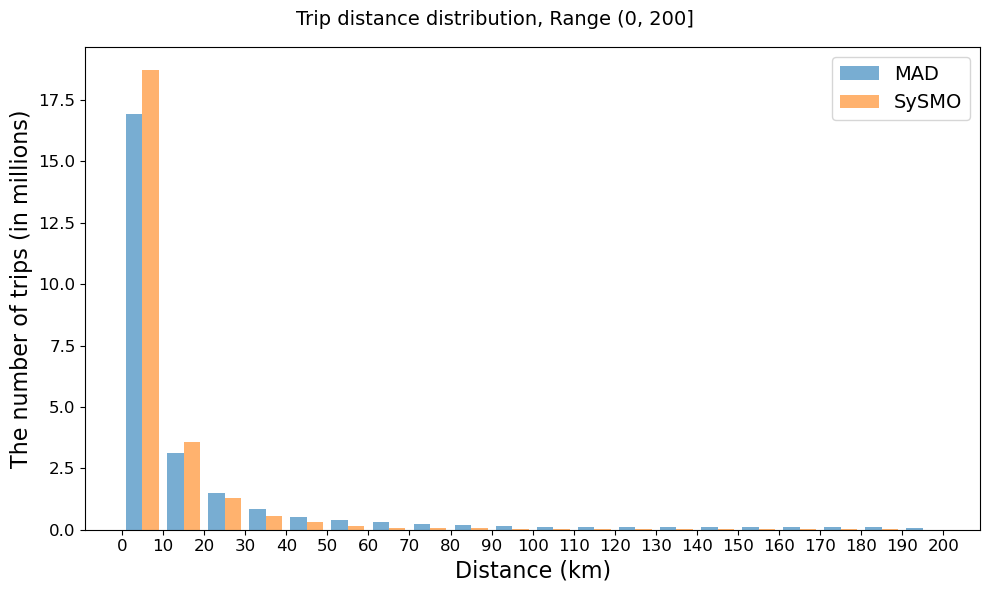

In [17]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (10, 6))


ax0.hist([df_act_schedule_0_dist['trip_distance'][df_act_schedule_0_dist['trip_distance']<201],df_syn_act_plan_dist['trip_distance'][df_syn_act_plan_dist['trip_distance']<201]], density=False, histtype='bar', alpha=0.6, bins=range(0,201,10), label=['MAD','SySMO'])

ax0.grid(visible=False)

ax0.legend( prop={'size': 14}, fontsize=14)
ax0.set_xlabel('Distance (km)', fontsize=16)
ax0.set_xticks(range(0,201,10),range(0,201,10), fontsize=12)
ax0.set_yticklabels(np.arange(0.00, 20.00, 2.5), fontsize=12)
ax0.set_ylabel('The number of trips (in millions)', fontsize=16)



fig.suptitle('Trip distance distribution, Range (0, 200]' , fontsize=14)
fig.tight_layout()
plt.savefig("./figures/trip_distance_MAD_SySMO_abs.png")
plt.show()


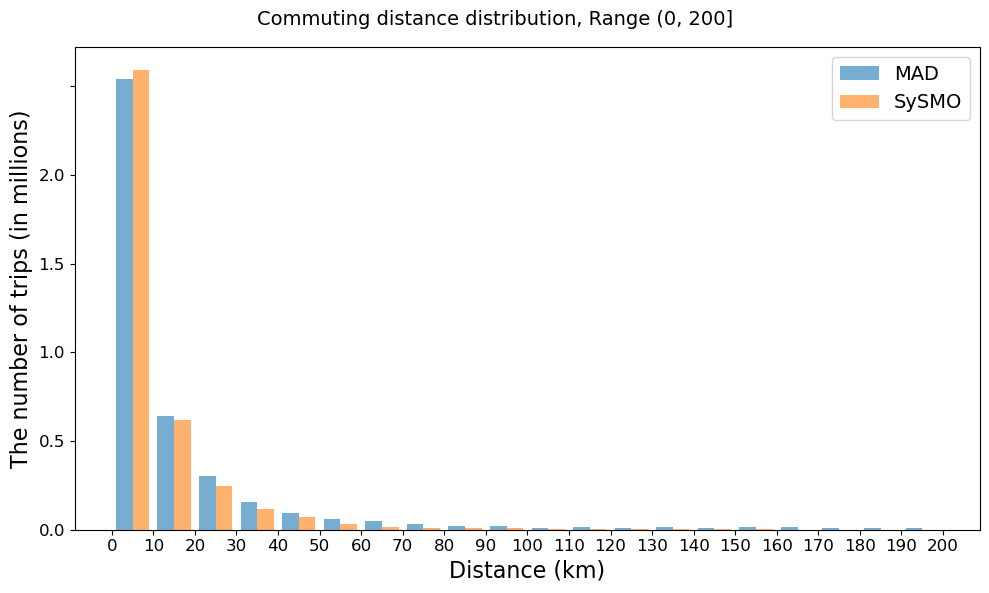

In [18]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (10, 6))


ax0.hist([MAD_commute,SySMo_commute], density=False, histtype='bar', alpha=0.6, bins=range(0,201,10), label=['MAD','SySMO'])

ax0.grid(visible=False)

ax0.legend( prop={'size': 14}, fontsize=14)
ax0.set_xlabel('Distance (km)', fontsize=16)
ax0.set_xticks(range(0,201,10),range(0,201,10), fontsize=12)
ax0.set_yticklabels(np.arange(0.00, 2.5, 0.5), fontsize=12)
ax0.set_ylabel('The number of trips (in millions)', fontsize=16)



fig.suptitle('Commuting distance distribution, Range (0, 200]' , fontsize=14)
fig.tight_layout()
plt.savefig("./figures/commute_distance_MAD_SySMO_abs.png")
plt.show()
